## Introduction :- 
+ The Data set 'wine.csv' has 178 records and following 14 columns 
1. 'Type': The categorical classification of wine, such as red or white.
2. 'Alcohol': The percentage of alcohol content in the wine.
3. 'Malic': The amount of malic acid in the wine.
4. 'Ash': The ash content in the wine.
5. 'Alcalinity': The level of ash alkalinity in the wine.
6. 'Magnesium': The concentration of magnesium in the wine.
7. 'Phenols': The total phenolic content in the wine.
8. 'Flavanoids': The concentration of flavonoids in the wine.
9. 'Nonflavanoids': The concentration of non-flavonoid phenols in the wine.
10. 'Proanthocyanins': The concentration of proanthocyanins in the wine.
11. 'Color': The color intensity of the wine.
12. 'Hue': The hue or color shade of the wine.
13. 'Dilution': The degree of dilution of the wine.
14. 'Proline': The concentration of proline, an amino acid, in the wine.

## Objective :- 
+ To Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering (scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)df

## Working :- 
+ We first the ignore the column 'Type' and keep it for final aggregate result comparision 
+ Scale the remaining columns 
+ Do PCA on the scaled Data to obtain PC1,PC2,PC3
+ Perform clustering using K-means and Hierarchical clustering of all data based on PC1,PC2,PC3
+ Compare the aggreagte('mean') value for each paramter after grouping each resultant dataframe based on 'Label'

## Basic Libraries and Data Import

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
wine_df = pd.read_csv("wine.csv")
wine_df.head(3)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [2]:
wine_df.shape

(178, 14)

In [3]:
wine_df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
wine_df['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [5]:
wine_df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [6]:
grp = wine_df.groupby('Type')

In [7]:
pev_study = grp.agg('mean')

## We ignore the feature 'Type' for futher study

In [8]:
df = pd.read_csv("wine.csv",usecols=['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'])
df.head(3)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


## Scale the Data

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
df1 = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df1.head(3)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148


### Dimensionality reduction

In [11]:
from sklearn.decomposition import PCA

In [12]:
pc = PCA(n_components=3)

In [14]:
pc_df = pd.DataFrame(pc.fit_transform(df1),columns=['PC1','PC2','PC3'])
pc_df.head(3)

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819


In [15]:
pc.singular_values_

array([28.94203422, 21.08225141, 16.04371561])

In [16]:
pc.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631])

### EDA :- 
+ We explore all the pair of first 3 principle components to exprole their cluster formation tendency 

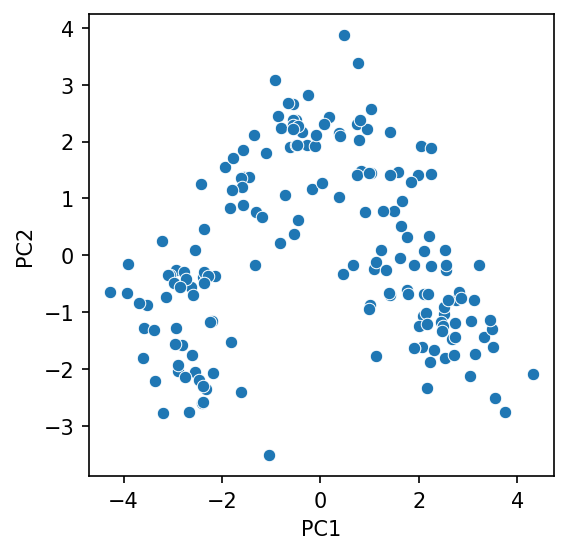

In [18]:
plt.figure(figsize=(4,4),dpi=150)
sns.scatterplot(x='PC1',y='PC2',data = pc_df)
plt.show()

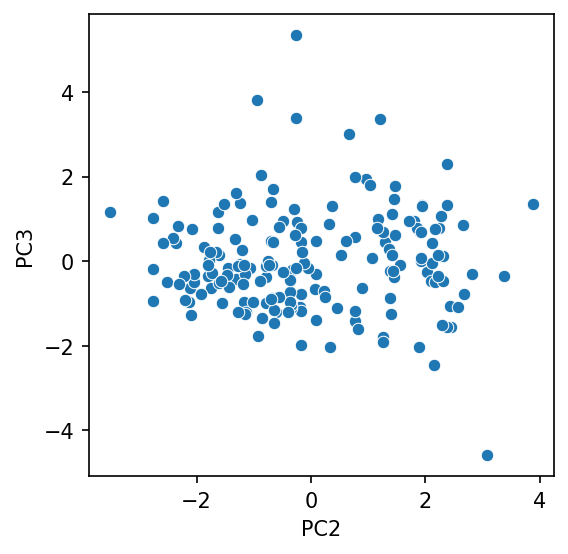

In [19]:
plt.figure(figsize=(4,4),dpi=150)
sns.scatterplot(x='PC2',y='PC3',data = pc_df)
plt.show()

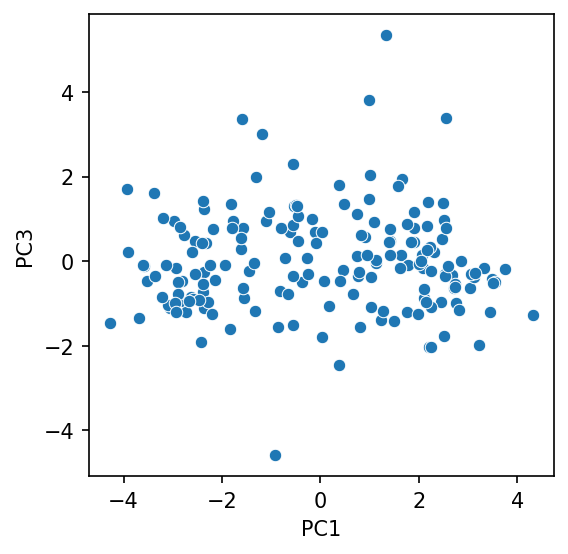

In [20]:
plt.figure(figsize=(4,4),dpi=150)
sns.scatterplot(x='PC1',y='PC3',data = pc_df)
plt.show()

## Clustering 

In [21]:
from sklearn.cluster import KMeans

In [22]:
wcss = []
for k in range(1,15):
    model = KMeans(n_clusters=k)
    model.fit(pc_df)
    wcss.append(model.inertia_)
wcss

[1539.5034801883057,
 886.1611364823485,
 512.999506766151,
 429.6196798263022,
 370.48020825316803,
 326.6343441126921,
 287.8441424227788,
 260.8113623176919,
 234.31772000823722,
 222.4880538991166,
 200.81779623705887,
 189.66130224062044,
 171.74029840172557,
 162.1315011855982]

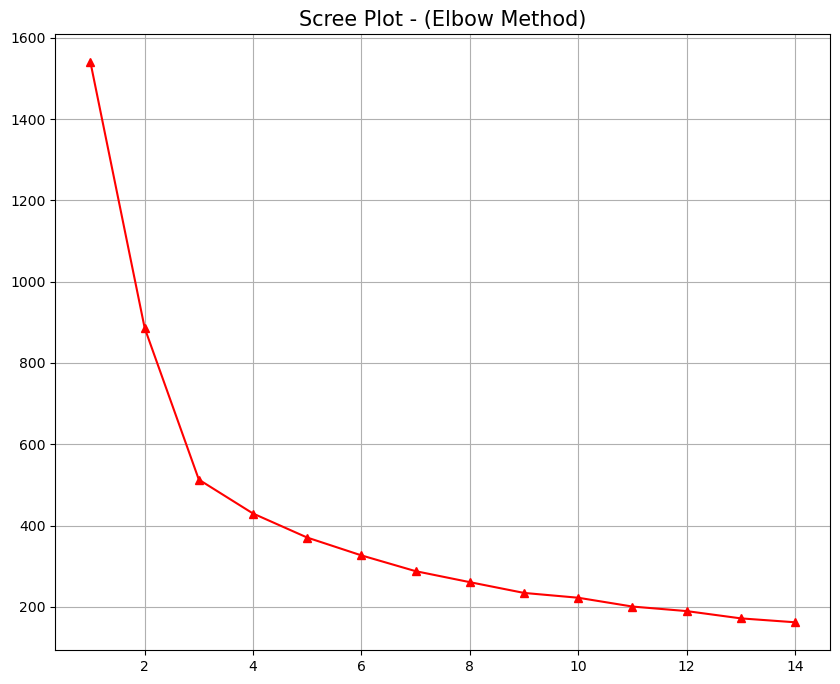

In [23]:
plt.figure(figsize=(10,8))
plt.plot(range(1,15),wcss,marker = '^',c='r',)
plt.title("Scree Plot - (Elbow Method)",fontsize=15)
plt.grid()
plt.show()

### Clear Elbow can be seen at number of clusters = 3 in the Scree - plot shown above. Hence, Optimum number of clusers = 3 

In [24]:
k_model = KMeans(n_clusters=3)
k_model.fit(pc_df)

KMeans(n_clusters=3)

In [25]:
k_labels = pd.Series(k_model.labels_,name="Class")

In [26]:
k_labels.value_counts()

0    64
2    63
1    51
Name: Class, dtype: int64

In [32]:
k_df = df.copy()
k_df['Labels'] = k_labels
k_df.head(3)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Labels
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2


In [33]:
k_grp = k_df.groupby('Labels')

In [46]:
k_study = k_grp.agg('mean')

## Hierrachical Clustering

In [35]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage

In [36]:
agg_df = pc_df.copy()

## From the Scree plot we have already determined the optimum number of clusters is 3

In [37]:
agg_model = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [38]:
agg_model.fit(agg_df)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [39]:
agg_label = agg_model.fit_predict(agg_df)
agg_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [40]:
linkage_matrix = hierarchy.linkage(agg_model.children_)
linkage_matrix[:][:5] # First 5 elements of linkage matrix

array([[171.        , 172.        ,   1.41421356,   2.        ],
       [ 34.        ,  74.        ,   2.23606798,   2.        ],
       [ 15.        ,  23.        ,   2.23606798,   2.        ],
       [  1.        ,  48.        ,   2.23606798,   2.        ],
       [ 16.        ,  51.        ,   2.23606798,   2.        ]])

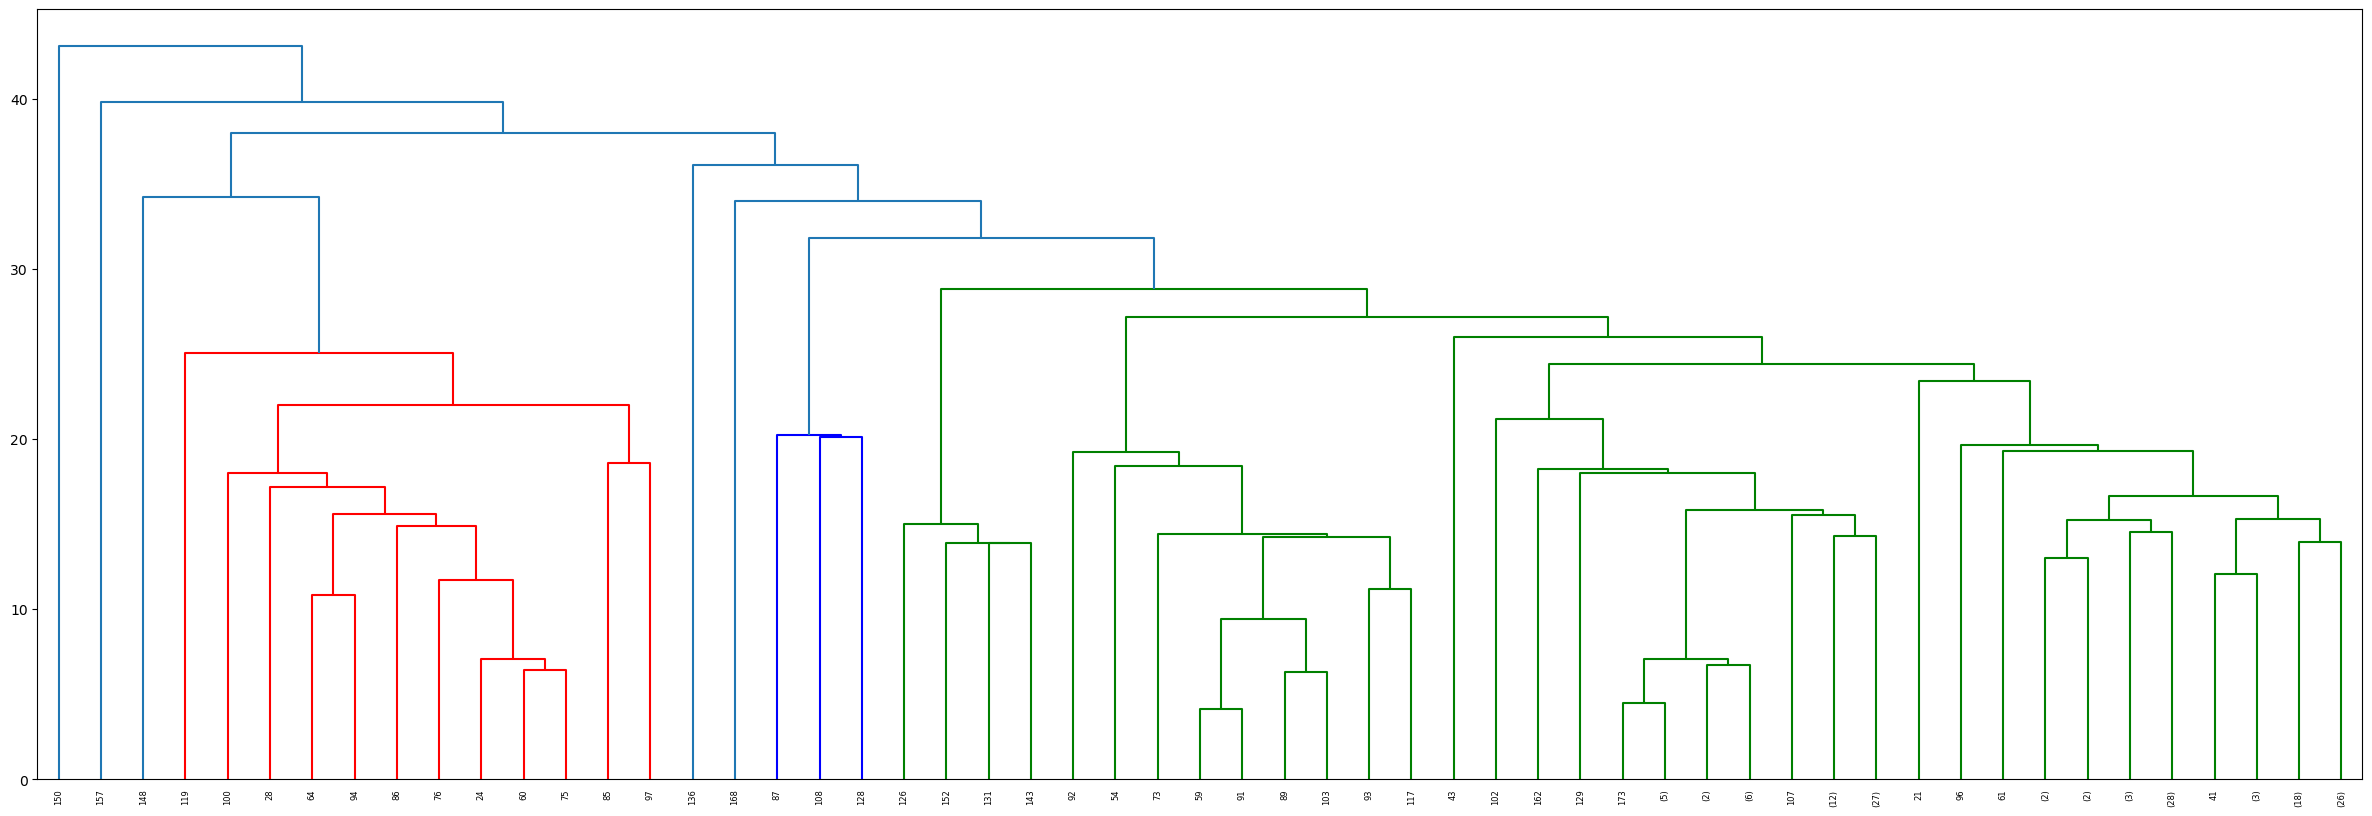

In [41]:
plt.figure(figsize=(30,10))
hierarchy.set_link_color_palette(['r','b','green','m','orange']) # colors for the clusters
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='level', p=15,
                          color_threshold=30) # color_threshold=10 sets clusters below y-axis value of 13 to be of the same color

In [42]:
hier_df = df.copy()
hier_df['Label'] = agg_label
hier_df.head(3)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Label
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0


In [44]:
grp = hier_df.groupby('Label')

In [47]:
hier_study = grp.agg('mean')

## Comparision of Final results obtained from both K-means and Hierarchical Clustering from that obtained by Previous Study

## 1. Results of Given Study :- 

In [48]:
pev_study

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


## 2. Result of K-Means

In [49]:
k_study

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Labels,,,,,,,,,,,,,
0,12.249062,1.910313,2.233281,20.087500,92.812500,2.227813,2.023438,0.359531,1.619063,2.949219,1.063063,2.803906,507.828125
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,13.656032,1.983175,2.460476,17.479365,107.650794,2.858254,3.015079,0.291270,1.922540,5.438413,1.065079,3.157143,1093.238095


## 3. Result of Hierarchical Clustering

In [50]:
hier_study

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Label,,,,,,,,,,,,,
0,13.065000,1.993396,2.406509,18.758491,101.990566,2.632075,2.663019,0.319151,1.858491,4.438585,1.063302,3.038113,853.707547
1,13.115600,3.381800,2.449800,21.750000,98.480000,1.701000,0.844400,0.457800,1.190400,7.216000,0.694800,1.741800,619.020000
2,12.429091,1.612727,1.984545,17.918182,91.772727,2.021818,1.668636,0.349545,1.211818,3.138636,1.044364,2.534091,522.863636


## Even Though all the classification yeilds the same number of clusters (=3 which is consistent to the Scree-plot result ) the aggregate mean values for different dimensions of the previous study is very similar to that of k-means results.
+ Provided 'Label :- 2,1,0' of 'k_study' is Compared to 'Type :- 1,3,2' of 'pev_study' respectively.
+ The minor difference between the values can be attributed to the fact that 'PC1','PC2','PC3' account for nearly 66 % explained variance as calculted above in 16 th line.